<a href="https://www.kaggle.com/code/sejalhanmante/financial-sentiment-analysis?scriptVersionId=227678425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv


# "Sentiment Analysis of Financial News: A Comparative Study of Machine Learning and Deep Learning Models" 

## Libraries

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords
import spacy


## About the dataset 

Fine-grained financial sentiment analysis on news headlines is a challenging task requiring human-annotated datasets to achieve high performance. Limited studies have tried to address the sentiment extraction task in a setting where multiple entities are present in a news headline. In an effort to further research in this area, we make publicly available SEntFiN 1.0, a human-annotated dataset of 10,700+ news headlines with entity-sentiment annotations, of which 2,800+ headlines contain multiple entities, often with conflicting sentiments.

Acknowledgements
Sinha, A., Kedas, S., Kumar, R., & Malo, P. (2022). SEntFiN 1.0: Entity‐aware sentiment analysis for financial news. Journal of the Association for Information Science and Technology.

DOI: https://doi.org/10.1002/asi.24634



In [5]:
df = pd.read_csv(r"/kaggle/input/aspect-based-sentiment-analysis-for-financial-news/SEntFiN-v1.1.csv",index_col='S No.')
df.head()

,Title,Decisions,Words
S No.,,,
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8


### Sentiment types 

In [6]:
df['Decisions'].value_counts()

Decisions
{"Sebi": "neutral"}                                           189
{"Nifty": "neutral"}                                          146
{"Nifty": "positive"}                                          59
{"Sensex": "negative"}                                         52
{"Nifty": "negative"}                                          47
                                                             ... 
{"Fortis": "neutral"}                                           1
{"Foreign brokerages": "negative"}                              1
{"Indian equities": "negative"}                                 1
{"European shares": "negative", "Germany DAX": "negative"}      1
{"IBM": "negative"}                                             1
Name: count, Length: 6564, dtype: int64

## Data Preprocessing
### Stopwords removal

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning
df['cleaned_text'] = df['Title'].apply(clean_text)  # Update column name
print(df[['Title', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
                                                   Title  \
S No.                                                      
1      SpiceJet to issue 6.4 crore warrants to promoters   
2                      MMTC Q2 net loss at Rs 10.4 crore   
3      Mid-cap funds can deliver more, stay put: Experts   
4                 Mid caps now turn into market darlings   
5      Market seeing patience, if not conviction: Pra...   

                                          cleaned_text  
S No.                                                   
1          spicejet issue 6 4 crore warrants promoters  
2                       mmtc q2 net loss rs 10 4 crore  
3               mid cap funds deliver stay put experts  
4                        mid caps turn market darlings  
5      market seeing patience conviction prakash diwan  


### Parsing the decisions column

Keeping only the sentiment not the organization related to the decision

In [8]:
df['Sentiment'] = df['Decisions'].apply(lambda x:(x.replace('"'," ").replace("{", '').replace('}', '').split()[-1]))
df

,Title,Decisions,Words,cleaned_text,Sentiment
S No.,,,,,
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,spicejet issue 6 4 crore warrants promoters,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,mmtc q2 net loss rs 10 4 crore,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,mid cap funds deliver stay put experts,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,mid caps turn market darlings,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,market seeing patience conviction prakash diwan,neutral
...,...,...,...,...,...
10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6,negative chambal advanta mitesh thacker,negative
10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6,small mid cap stocks may emerge outperformers,positive
10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5,rupee slips us dollar,neutral


In [9]:
df_copy = df.drop(['Decisions'],axis=1)
df_copy

,Title,Words,cleaned_text,Sentiment
S No.,,,,
1,SpiceJet to issue 6.4 crore warrants to promoters,8,spicejet issue 6 4 crore warrants promoters,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,8,mmtc q2 net loss rs 10 4 crore,neutral
3,"Mid-cap funds can deliver more, stay put: Experts",8,mid cap funds deliver stay put experts,positive
4,Mid caps now turn into market darlings,7,mid caps turn market darlings,positive
5,"Market seeing patience, if not conviction: Pra...",8,market seeing patience conviction prakash diwan,neutral
...,...,...,...,...
10749,"Negative on Chambal, Advanta: Mitesh Thacker",6,negative chambal advanta mitesh thacker,negative
10750,"Small, Mid-cap stocks may emerge outperformers",6,small mid cap stocks may emerge outperformers,positive
10751,Rupee slips against US dollar,5,rupee slips us dollar,neutral


## FINBert

In [10]:
from transformers import pipeline

# Load FinBERT sentiment analysis model
sentiment_model = pipeline("text-classification", model="ProsusAI/finbert")

# Predict sentiment
df['sentiment_predicted'] = df['cleaned_text'].apply(lambda x: sentiment_model(x)[0]['label'])
print(df[['cleaned_text', 'sentiment_predicted']].head())


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                          cleaned_text sentiment_predicted
S No.                                                                     
1          spicejet issue 6 4 crore warrants promoters             neutral
2                       mmtc q2 net loss rs 10 4 crore            negative
3               mid cap funds deliver stay put experts             neutral
4                        mid caps turn market darlings             neutral
5      market seeing patience conviction prakash diwan             neutral


In [11]:
from sklearn.metrics import classification_report

# Convert sentiment labels to numerical (if needed)
label_mapping = {"positive": 1, "neutral": 0, "negative": -1}
df['sentiment_label'] = df['sentiment_predicted'].map(label_mapping)

# Compare against ground truth (if available)
y_true = df['Sentiment'] 
y_pred = df['sentiment_predicted']

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

    negative       0.64      0.63      0.64      2856
     neutral       0.59      0.74      0.66      4533
    positive       0.68      0.45      0.54      3364

    accuracy                           0.62     10753
   macro avg       0.64      0.61      0.61     10753
weighted avg       0.63      0.62      0.61     10753



In [12]:
## Sentiment numeric mapping 

map_decisions = {'neutral': 2, 'positive': 1, "negative": 0} # map data

df["Sentiment"] = df["Sentiment"].map(map_decisions)

## LSTM

### Word Embeddings 

In [13]:
import gensim
from gensim.models import Word2Vec

# Tokenize Text for Word2Vec
df['tokenized'] = df['cleaned_text'].apply(lambda x: x.split())

# Train Word2Vec Model
w2v_model = Word2Vec(sentences=df['tokenized'], vector_size=100, window=5, min_count=1, workers=4)

# Convert Text to Vectors
def text_to_vec(text, model, vector_size=100):
    words = text.split()
    vector = [model.wv[word] for word in words if word in model.wv]
    return sum(vector) / len(vector) if vector else [0] * vector_size  # Average word vectors

X_w2v = df['cleaned_text'].apply(lambda x: text_to_vec(x, w2v_model)).tolist()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional

# Convert to TensorFlow format
import numpy as np
X_w2v = np.array(X_w2v)
y = np.array(df["Sentiment"])

# Define LSTM Model
model = Sequential([
    Embedding(input_dim=len(w2v_model.wv), output_dim=100, input_length=100, trainable=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes (positive, neutral, negative)
])

# Compile & Train
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_w2v, y, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


269/269 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4706 - loss: 1.0257 - val_accuracy: 0.2106 - val_loss: 1.4081
Epoch 2/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4829 - loss: 1.0199 - val_accuracy: 0.2152 - val_loss: 1.4581
Epoch 3/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4944 - loss: 1.0160 - val_accuracy: 0.2152 - val_loss: 1.4792
Epoch 4/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5037 - loss: 1.0076 - val_accuracy: 0.2152 - val_loss: 1.4592
Epoch 5/5
269/269 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.4914 - loss: 1.0214 - val_accuracy: 0.2152 - val_loss: 1.4575


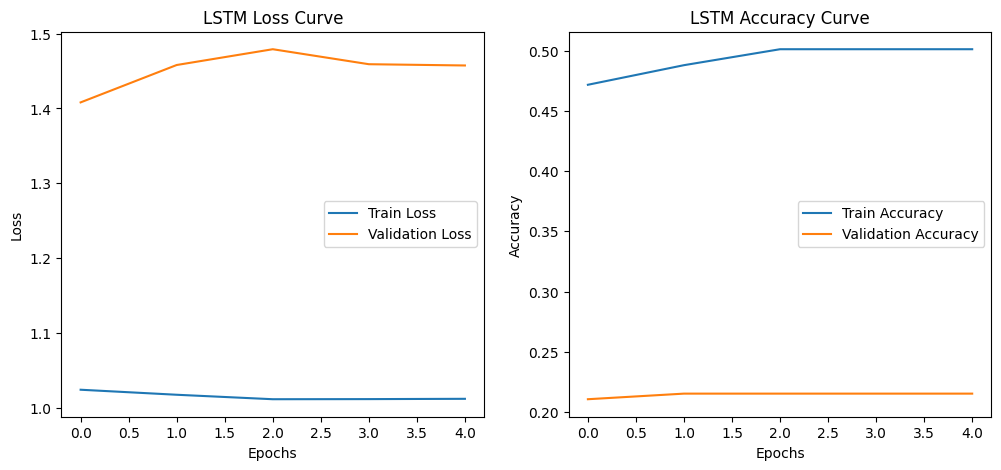

In [15]:
import matplotlib.pyplot as plt

# Retrieve history
history = model.history

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Loss Curve')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Accuracy Curve')
plt.legend()

plt.show()


## TF-IDF Vectorization 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text']).toarray()  # Convert text to numerical representation
y = df['Sentiment']


## ML models 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.7601
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       582
           1       0.77      0.75      0.76       670
           2       0.73      0.83      0.78       899

    accuracy                           0.76      2151
   macro avg       0.77      0.75      0.76      2151
weighted avg       0.76      0.76      0.76      2151


SVM Results:
Accuracy: 0.7517
              precision    recall  f1-score   support

           0       0.81      0.64      0.71       582
           1       0.75      0.74      0.75       670
           2       0.72      0.84      0.78       899

    accuracy                           0.75      2151
   macro avg       0.76      0.74      0.75      2151
weighted avg       0.76      0.75      0.75      2151


Random Forest Results:
Accuracy: 0.7336
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       582
          